# Random Forest

##### Diana Rueda

In [2]:
import numpy as np 
import pandas as pd


In [3]:
data = pd.read_csv("airbnb_dummies.csv")

In [4]:
data.head()

,Unnamed: 0,price,minimum_nights,number_of_reviews,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,1,225,1,45,355,0,0,1,0,0,1,0,0
1,2,89,1,270,194,0,1,0,0,0,1,0,0
2,3,200,3,74,129,0,0,1,0,0,1,0,0
3,4,79,2,430,220,0,0,1,0,0,0,1,0
4,5,150,1,160,188,0,0,1,0,0,1,0,0


In [5]:
# Identify columns with missing values
missing_data = data.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")



Unnamed: 0
False    32809
Name: Unnamed: 0, dtype: int64

price
False    32809
Name: price, dtype: int64

minimum_nights
False    32809
Name: minimum_nights, dtype: int64

number_of_reviews
False    32809
Name: number_of_reviews, dtype: int64

availability_365
False    32809
Name: availability_365, dtype: int64

neighbourhood_group_Bronx
False    32809
Name: neighbourhood_group_Bronx, dtype: int64

neighbourhood_group_Brooklyn
False    32809
Name: neighbourhood_group_Brooklyn, dtype: int64

neighbourhood_group_Manhattan
False    32809
Name: neighbourhood_group_Manhattan, dtype: int64

neighbourhood_group_Queens
False    32809
Name: neighbourhood_group_Queens, dtype: int64

neighbourhood_group_Staten Island
False    32809
Name: neighbourhood_group_Staten Island, dtype: int64

room_type_Entire home/apt
False    32809
Name: room_type_Entire home/apt, dtype: int64

room_type_Private room
False    32809
Name: room_type_Private room, dtype: int64

room_type_Shared room
False    32809
Name: r

In [6]:
# minimizing columns to necessary data
data.drop(["Unnamed: 0"], axis = 1, inplace = True)
data.head()

,price,minimum_nights,number_of_reviews,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,225,1,45,355,0,0,1,0,0,1,0,0
1,89,1,270,194,0,1,0,0,0,1,0,0
2,200,3,74,129,0,0,1,0,0,1,0,0
3,79,2,430,220,0,0,1,0,0,0,1,0
4,150,1,160,188,0,0,1,0,0,1,0,0


In [7]:
data.describe()

,price,minimum_nights,number_of_reviews,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
count,32809.000000,32809.000000,32809.000000,32809.000000,32809.000000,32809.000000,32809.000000,32809.000000,32809.000000,32809.000000,32809.000000,32809.000000
mean,136.151757,6.398062,29.856533,127.269926,0.024262,0.404676,0.435429,0.127099,0.008534,0.526593,0.456003,0.017404
std,89.930805,15.691859,51.120607,127.728590,0.153863,0.490837,0.495821,0.333089,0.091987,0.499300,0.498068,0.130772
min,35.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,70.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,110.000000,2.000000,8.000000,82.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,176.000000,4.000000,36.000000,247.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,500.000000,1000.000000,629.000000,364.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
# minimum_nights is only out of 365 
data = data[data.minimum_nights <= 365]
data.reset_index(drop=True, inplace=True)

## Building random forest regressor

In [9]:
price = np.array(data["price"])
data = data.drop("price", axis = 1)
variable_list = list(data.columns)
data = np.array(data)

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(data, price, test_size = 0.30, random_state = 10)

In [12]:
print("Training data shape: ", X_train.shape)
print("Training price shape: ", y_train.shape)
print("Testing data shape: ", X_test.shape)
print("Testing price shape: ", y_test.shape)

Training data shape:  (22962, 11)
Training price shape:  (22962,)
Testing data shape:  (9842, 11)
Testing price shape:  (9842,)


In [13]:
from sklearn.ensemble import RandomForestRegressor


In [14]:
ran_forest = RandomForestRegressor(n_estimators = 1000, random_state = 10)
ran_forest.fit(X_train, y_train)


RandomForestRegressor(n_estimators=1000, random_state=10)

In [15]:
predicted = ran_forest.predict(X_test)
errors = abs(predicted - y_test)
print("Mean Absolute Error: ", round(np.mean(errors), 2))

Mean Absolute Error:  49.71


In [16]:
percent_error = 100 * (errors / y_test)
accuracy = 100 - np.mean(percent_error)
print("Accuracy: ", round(accuracy, 2), "%")

Accuracy:  59.46 %


## Importance of features for optimization

In [18]:
importances = list(ran_forest.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(variable_list, importances)]

feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

[print("Variable: {:20} Importance: {}".format(*pair)) for pair in feature_importances];



Variable: room_type_Entire home/apt Importance: 0.36
Variable: availability_365     Importance: 0.28
Variable: number_of_reviews    Importance: 0.18
Variable: minimum_nights       Importance: 0.1
Variable: neighbourhood_group_Manhattan Importance: 0.08
Variable: neighbourhood_group_Brooklyn Importance: 0.01
Variable: neighbourhood_group_Bronx Importance: 0.0
Variable: neighbourhood_group_Queens Importance: 0.0
Variable: neighbourhood_group_Staten Island Importance: 0.0
Variable: room_type_Private room Importance: 0.0
Variable: room_type_Shared room Importance: 0.0


## New model without some features of zero importance

In [61]:
data2 = pd.read_csv("airbnb_dummies.csv")
data2.drop(["Unnamed: 0","neighbourhood_group_Staten Island","room_type_Shared room"], axis = 1, inplace = True)
data2.reset_index(drop=True, inplace=True)
data2.head()


,price,minimum_nights,number_of_reviews,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,room_type_Entire home/apt,room_type_Private room
0,225,1,45,355,0,0,1,0,1,0
1,89,1,270,194,0,1,0,0,1,0
2,200,3,74,129,0,0,1,0,1,0
3,79,2,430,220,0,0,1,0,0,1
4,150,1,160,188,0,0,1,0,1,0


In [62]:
price = np.array(data2["price"])
data2 = data2.drop("price", axis = 1)
variable_list = list(data2.columns)
data2 = np.array(data2)

X_train, X_test, y_train, y_test = train_test_split(data2, price, test_size = 0.30, random_state = 10)

print("Training data shape: ", X_train.shape)
print("Training price shape: ", y_train.shape)
print("Testing data shape: ", X_test.shape)
print("Testing price shape: ", y_test.shape)

Training data shape:  (22966, 9)
Training price shape:  (22966,)
Testing data shape:  (9843, 9)
Testing price shape:  (9843,)


In [63]:
model = RandomForestRegressor(n_estimators = 100, random_state = 10)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=10)

In [64]:
predicted = model.predict(X_test)
errors = abs(predicted - y_test)
print("Mean Absolute Error: ", round(np.mean(errors), 2))



Mean Absolute Error:  48.7


In [65]:
percent_error = 100 * (errors / y_test)
accuracy = 100 - np.mean(percent_error)
print("Accuracy: ", round(accuracy, 2), "%")


Accuracy:  60.0 %


This is the best accuracy that could be obtained. Multiple combinations of predictors were explored based on the initial data analysis.

## Binning to prepare for random forest classification

In [24]:
data = pd.read_excel("data.xlsx")
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Unnamed: 16,Unnamed: 17
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,NaN,NaN
1,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,NaN,NaN
2,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129,NaN,NaN
3,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220,NaN,NaN
4,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188,NaN,NaN


In [25]:
# minimizing columns to necessary data
data.drop(["Unnamed: 16","number_of_reviews","neighbourhood","Unnamed: 17", "id", "name","host_id","host_name","latitude","longitude","last_review", "reviews_per_month", "calculated_host_listings_count"], axis = 1, inplace = True)
data.head()

,neighbourhood_group,room_type,price,minimum_nights,availability_365
0,Manhattan,Entire home/apt,225,1,355
1,Brooklyn,Entire home/apt,89,1,194
2,Manhattan,Entire home/apt,200,3,129
3,Manhattan,Private room,79,2,220
4,Manhattan,Entire home/apt,150,1,188


In [26]:
# Identify columns with missing values
missing_data = data.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")




neighbourhood_group
False    32809
Name: neighbourhood_group, dtype: int64

room_type
False    32809
Name: room_type, dtype: int64

price
False    32809
Name: price, dtype: int64

minimum_nights
False    32809
Name: minimum_nights, dtype: int64

availability_365
False    32809
Name: availability_365, dtype: int64



In [27]:
data.describe()

,price,minimum_nights,availability_365
count,32809.000000,32809.000000,32809.000000
mean,136.151757,6.398062,127.269926
std,89.930805,15.691859,127.728590
min,35.000000,1.000000,0.000000
25%,70.000000,1.000000,3.000000
50%,110.000000,2.000000,82.000000
75%,176.000000,4.000000,247.000000
max,500.000000,1000.000000,364.000000


In [28]:
data = data[data.minimum_nights <= 365]
data.reset_index(drop=True, inplace=True)

In [29]:
# binning number of minimum nights into groups of characteristic numbers
bins = np.array([0,4,10,20,40,100,300,365])
labels = ["1", "7","15","30", "90","180","300"]
data['minimum_nights'] = pd.cut(data['minimum_nights'], bins = bins, labels = labels, include_lowest = True)
data.head()

,neighbourhood_group,room_type,price,minimum_nights,availability_365
0,Manhattan,Entire home/apt,225,1,355
1,Brooklyn,Entire home/apt,89,1,194
2,Manhattan,Entire home/apt,200,1,129
3,Manhattan,Private room,79,1,220
4,Manhattan,Entire home/apt,150,1,188


In [30]:
# binning availability into groups of characteristic numbers
bins = np.array([0,40,100,200,365])
labels = ["30", "90","180","365"]
data['availability_365'] = pd.cut(data['availability_365'], bins = bins, labels = labels, include_lowest = True)
data.head()

,neighbourhood_group,room_type,price,minimum_nights,availability_365
0,Manhattan,Entire home/apt,225,1,365
1,Brooklyn,Entire home/apt,89,1,180
2,Manhattan,Entire home/apt,200,1,180
3,Manhattan,Private room,79,1,365
4,Manhattan,Entire home/apt,150,1,180


In [31]:
# binning price into groups 
bins = np.array([0,70,110,176,500])
labels = ["very low", "low", "high", "very high"]
data['price'] = pd.cut(data['price'], bins = bins, labels = labels, include_lowest = True)
data.head()

,neighbourhood_group,room_type,price,minimum_nights,availability_365
0,Manhattan,Entire home/apt,very high,1,365
1,Brooklyn,Entire home/apt,low,1,180
2,Manhattan,Entire home/apt,very high,1,180
3,Manhattan,Private room,low,1,365
4,Manhattan,Entire home/apt,high,1,180


## Dummy variables after binning

In [32]:
dummy_neighbourhood = pd.get_dummies(data["neighbourhood_group"])
dummy_room = pd.get_dummies(data["room_type"])
dummy_nights = pd.get_dummies(data["minimum_nights"])
dummy_availability = pd.get_dummies(data["availability_365"])


data_dummy = pd.concat([data, dummy_neighbourhood, dummy_room, dummy_nights, dummy_availability], axis = 1)
data_dummy.head()


,neighbourhood_group,room_type,price,minimum_nights,availability_365,Bronx,Brooklyn,Manhattan,Queens,Staten Island,...,7,15,30,90,180,300,30,90,180,365
0,Manhattan,Entire home/apt,very high,1,365,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,Brooklyn,Entire home/apt,low,1,180,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,Manhattan,Entire home/apt,very high,1,180,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,Manhattan,Private room,low,1,365,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,Manhattan,Entire home/apt,high,1,180,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [33]:
# minimizing columns to necessary data
data_dummy.drop(["neighbourhood_group","room_type","minimum_nights","availability_365"], axis = 1, inplace = True)
data_dummy.head()

,price,Bronx,Brooklyn,Manhattan,Queens,Staten Island,Entire home/apt,Private room,Shared room,1,7,15,30,90,180,300,30,90,180,365
0,very high,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1
1,low,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0
2,very high,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0
3,low,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1
4,high,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0


## Random Forest Classifier

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
price = np.array(data_dummy["price"])
data_dummy = data_dummy.drop("price", axis = 1)
variable_list = list(data_dummy.columns)
data_dummy = np.array(data_dummy)

X_train, X_test, y_train, y_test = train_test_split(data_dummy, price, test_size = 0.30, random_state = 10)

print("Training data shape: ", X_train.shape)
print("Training price shape: ", y_train.shape)
print("Testing data shape: ", X_test.shape)
print("Testing price shape: ", y_test.shape)

Training data shape:  (22962, 19)
Training price shape:  (22962,)
Testing data shape:  (9842, 19)
Testing price shape:  (9842,)


In [36]:
model = RandomForestClassifier(n_estimators = 1000, bootstrap = True)
model.fit(X_train, y_train)


RandomForestClassifier(n_estimators=1000)

In [37]:
predicted = model.predict(X_test)
probs = model.predict_proba(X_test)


In [38]:
from sklearn.metrics import roc_auc_score

In [39]:
roc_value = roc_auc_score(y_test, probs, multi_class = "ovr")
roc_value

0.7778199342096316

This is the best accuracy based on significant variables

In [40]:
from sklearn.metrics import confusion_matrix


In [41]:
cm = confusion_matrix(y_test, predicted)
print("Confusion Matrix")
print(cm)

Confusion Matrix
[[ 964  397  789  218]
 [ 609  747  235  850]
 [ 730  191 1449   77]
 [  97  429   19 2041]]


In [42]:
from sklearn.metrics import plot_confusion_matrix

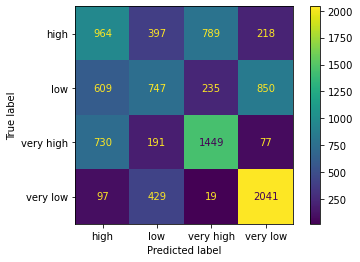

In [44]:
plot_confusion_matrix(model,X_test, y_test)
